#Credit Scoring: Predict the probability of going default 
    Algorithm: Logistic Regression (10 features with 1 target)

    Data: https://www.kaggle.com/c/GiveMeSomeCredit
    
    By: Hee Kyung, Yoon

In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 0. LOAD DATA
    1. load data
    2. check data

## 1. PROCESS DATA (-> X, y)
    1. split data into training, cross validation and test data sets
    2. splitData to X & y
    3. featureScale


## 2. BUILD FIRST MODEL
    1. Train   
    2. Predict

## 3. EVALUATE MODEL
    Learning Curve
    
## 4. MODIFY MODEL
    1. Add polynomial features
    2. Modify C (regularization term)
    3. Modify Threshold
    4. Modified Model

----------------------------------------------------------------------------------------------------------------------------------------------------

# 0. LOAD DATA
    1. load data
    2. check data

In [2]:
def load(filename):
    '''
    filenname: string ('test.csv')
    
    returns: DataFrame
    '''
    data = pd.DataFrame.from_csv(filename, encoding = 'utf-8')
    print '\nData Columns:'
    for i in range(len(data.columns)):
        print '\t',i,'\t', data.columns[i]

    check(data)
    
    return data

def check(X):
    '''
    X: DataFrame or Series
    
        prints shape and head
    
    returns: None
    '''
    print '\nShape is:\n', X.shape
    print X.head()

data = load('training.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30-59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60-89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(90000, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
42082                  1                              1.173509   33   
47463                  0                              0.040118   67   
6412                   0                              0.228882   68   
142967                 0                              0.558521   50   
51191                  0                              0.000000   65   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                                      3   0.430443           5570   
47463                                      0   0.007237          10500   
6412    

In [4]:
# Remove outliers in terms of income

# Make a dictionary of single columns
singleColDict = {}
for i in data.columns:
    singleColDict[i] = np.nan_to_num(data[i])
    

## Remove over > 10,000
# sort

# remove
lt10000 = singleColDict['MonthlyIncome'] <= 10000

In [5]:
lt10000

42082      True
47463     False
6412       True
142967    False
51191      True
101607     True
78080      True
71133      True
92953      True
57691      True
14734     False
101685     True
46801      True
88538      True
12670      True
114441     True
114188     True
76914      True
26251      True
58124      True
6651       True
55682     False
47055      True
100960     True
13631      True
124744     True
1899       True
146194     True
128135     True
140286     True
          ...  
125089     True
51635      True
23180      True
61871      True
100222     True
57165      True
19815      True
75303      True
108353     True
10393      True
75396      True
96572      True
46548      True
75003      True
62957      True
130338     True
48373      True
149725     True
147352     True
111956     True
68213     False
22456      True
2267       True
109663     True
129436     True
36678      True
35519      True
57500      True
129582     True
90126      True
Name: MonthlyIncome, dty

In [6]:
data_lt10000 = data[lt10000]

In [7]:
data_lt10000

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
42082,1,1.173509,33,3,0.430443,5570,13,5,0,2,2
6412,0,0.228882,68,0,0.137878,3872,6,0,0,0,0
51191,0,0.000000,65,0,0.007198,3750,4,0,0,0,0
101607,0,0.000283,55,0,0.000000,1468,6,0,0,0,3
78080,0,0.109020,44,0,0.229872,1800,5,0,0,0,0
71133,0,0.000000,34,0,2.588556,1100,6,0,1,0,1
92953,1,0.003454,57,1,1954.000000,NaN,6,0,2,1,2
57691,0,0.168786,43,0,0.488111,8200,11,0,2,0,0
101685,0,0.331162,45,1,0.351471,1800,8,0,0,0,0
46801,0,0.000000,60,0,0.000000,4792,2,0,0,0,1


In [8]:
data_lt10000.shape

(79035, 11)

(array([ 20343.,   3897.,   7566.,   8947.,   8943.,   8364.,   6940.,
          5413.,   4533.,   4089.]),
 array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
          7000.,   8000.,   9000.,  10000.]),
 <a list of 10 Patch objects>)

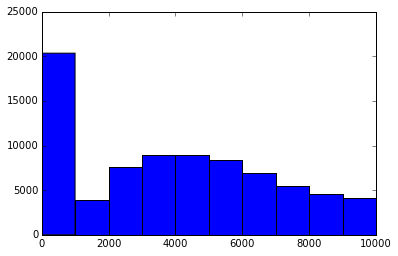

In [14]:
plt.hist(np.array(singleColDict['MonthlyIncome'][lt10000]))

In [9]:
data_lt10000.to_csv('training_79035_income_lt10000.csv', encoding = 'utf-8')

#1. PROCESS DATA (-> X, y)
    1. split data into Training, Cross validation & Test sets
    2. splitData to X & y
    3. featureScale

In [35]:
# 1. Split data into training data, cross validation data, and test data
'''
import random


# Shuffle index
index = np.array(data.index)
random.shuffle(index)

print index.shape
print index
'''
index = np.array(data.index)
# training set (1/15)
#trainingSize = data.shape[0] * (10000/90000)
training = data.ix[index[:20000]]

training.to_csv('training_20000.csv', encoding='utf-8')

print '\n', training.shape
print training.head()
'''
# crossValidation set (20%)
crossValSize = data.shape[0] * 0.20
crossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]

crossValidation.to_csv('crossValidation.csv', encoding='utf-8')

print '\n', crossValidation.shape

# test set (20%)
test = data.ix[index[trainingSize + crossValSize:]]

test.to_csv('test.csv', encoding = 'utf-8')

print '\n', crossValidation.shape
'''


(20000, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
42082                  1                              1.173509   33   
47463                  0                              0.040118   67   
6412                   0                              0.228882   68   
142967                 0                              0.558521   50   
51191                  0                              0.000000   65   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                                      3   0.430443           5570   
47463                                      0   0.007237          10500   
6412                                       0   0.137878           3872   
142967                                     0   0.211546          12800   
51191                                      0   0.007198           3750   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
42082                                13        

"\n# crossValidation set (20%)\ncrossValSize = data.shape[0] * 0.20\ncrossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]\n\ncrossValidation.to_csv('crossValidation.csv', encoding='utf-8')\n\nprint '\n', crossValidation.shape\n\n# test set (20%)\ntest = data.ix[index[trainingSize + crossValSize:]]\n\ntest.to_csv('test.csv', encoding = 'utf-8')\n\nprint '\n', crossValidation.shape\n"

In [4]:
# load split data

training = load('training.csv')
cv = load('crossValidation.csv')
test = load('test.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30-59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60-89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(90000, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
42082                  1                              1.173509   33   
47463                  0                              0.040118   67   
6412                   0                              0.228882   68   
142967                 0                              0.558521   50   
51191                  0                              0.000000   65   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                                      3   0.430443           5570   
47463                                      0   0.007237          10500   
6412    

In [5]:
# 2. splitData to X & y

def splitData(Xandy):
    '''
    Xandy:
    
    returns: X, y
    '''
    X = Xandy.iloc[:, 1:]
    #check(Xtrain)

    y = Xandy['SeriousDlqin2yrs']
    #check(ytrain)
    
    # fill nan with 0
    X = X.fillna(0)
    y = y.fillna(0)
    return X, y



# 3. feature scaling X
def featureScale(X):
    '''
    X: DataFrame
    
    returns: DataFrame (feature scaled)
    '''
    for col in range(X.shape[1]):
        #print 'col index:', col
        copied = X.iloc[:, col]
        #print 'head\n', copied.head()
        #print 'mean: ', copied.mean()
        #print 'std: ', copied.std()
        X.iloc[:, col] = (copied - copied.mean())/copied.std()
    return X

In [6]:
Xtrain, ytrain = splitData(training)
Xtrain = featureScale(Xtrain)
check(Xtrain)

Xcv, ycv = splitData(cv)
Xcv = featureScale(Xcv)

Xtest, ytest = splitData(test)
Xtest = featureScale(Xtest)


Shape is:
(90000, 10)
        RevolvingUtilizationOfUnsecuredLines       age  \
42082                              -0.021570 -1.303803   
47463                              -0.027005  0.996573   
6412                               -0.026100  1.064231   
142967                             -0.024519 -0.153615   
51191                              -0.027197  0.861257   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                               0.599827  -0.240037       0.018670   
47463                              -0.100036  -0.240334       0.435878   
6412                               -0.100036  -0.240243      -0.125025   
142967                             -0.100036  -0.240191       0.630518   
51191                              -0.100036  -0.240334      -0.135349   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
42082                          0.889610                 1.108264   
47463                          1.669514        

# 2. BUILD FIRST MODEL
    1. Train
        method 1) Manually Implemented
        method 2) LogisticRegression module -> We'll stick to this onward!
    2. Predict

In [7]:
# 1. Train
    # method 1) Manually Implemented

from scipy.optimize import fmin_cg

# Add Bias terms to Xtrain
def addBias(X):
    '''
    X: DataFrame (m * n)
    
        Adds bias terms to the first column
    
    returns: DataFrame (m * (n + 1))
    '''
    X.insert(0, 'Bias', 1)
    return X



# logisticRegression
L = 0.1

def logisticRegression(costfunction, gradFunction, X, y, L):
    '''
    constFunction: function
    X: matrix
    y: vector
    L (lambda): float
    
    returns: vector (theta)
    '''
    initial_theta = np.zeros(n+1)
    args = (X, y, L)
    theta = fmin_cg(f = costFunction, x0 = initial_theta, \
                    fprime = gradFunction, args = args)
    return theta

# costFunction
def costFunction(theta, *args):
    '''
    theta: vector
    X: matrix
    y: vector
    L (lambda): float
    
    returns: float (J)
    '''
    #J = sum(np.multiply(np.log(sigmoid(X.dot(theta))), -y) - \
    #       np.multiply((1 - y),log(1 - sigmoid(X.dot(theta)))))/m 
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    J = np.log(sigmoid(X.dot(theta))).T.dot(-y)
    #print '1',J
    J = J - pd.DataFrame(1 - y).T.dot(np.log(1 - sigmoid(X.dot(theta))))
    #print '2', J
    J = np.sum(J)/m
    #print '3', J
    J = J + (L/(2.0*m)) * np.sum(theta[1:]**2)
    #print '4',J
    
    return np.array(J)

# gradFunction
def gradFunction(theta, *args):
    # grad = transpose(sigmoid(X * y)) * y + lambda * sum(theta[1:])/m
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    grad = X.T.dot(sigmoid(X.dot(theta)) - pd.DataFrame(y))/m
    #print grad.shape
    
    # Regularize
    theta = (L/m)*theta
    theta[0] = 0
    #print theta.shape
    #print theta
    
    grad = np.array(grad + theta)
    grad = grad.reshape(n+1)
    
    return grad

# sigmoid
def sigmoid(z):
    '''
    x: float
    
    returns: float
    '''
    return 1.0/(1.0 + np.exp(-z))


In [8]:
# 1. Train
    # method 2) LogisticRegression Module

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [9]:
# 2. Predict

from sklearn.metrics import precision_recall_fscore_support

def predict(clf, X, y, threshold = 0.5):
    '''
    clf
    X
    y
    threshold
    
        prints measures (accuracy, precision, recall, F-score)
    
    returns: prediction(vector) 
            
    '''
    # get prediction
    prediction = getPrediction(clf, X, threshold)
    
    # get measures
    measures = getMeasures(y, prediction)
    accuracy, precision, recall, fscore = measures
    
    print '\naccuracy', accuracy
    print 'precision', precision
    print 'recall', recall
    print 'fscore', fscore
    
    return prediction

def getPrediction(clf, X, threshold = 0.5):
    '''
    clf: LogisticRegression()
    X
    threshold
    
    return: prediction (label vector)
    '''
    #proba = clf.predict_proba(X)[:,1]
    #return (proba > threshold) * 1
    print clf.classes_
    proba_all = clf.predict_proba(X)
    plt.figure()
    plt.hist(proba_all[:,0])
    plt.figure()
    plt.hist(proba_all[:,1])
    print proba_all
    
    return (proba_all[:, 1] > threshold) * 1

def getMeasures(y, prediction):
    '''
    
    returns: measures
    '''
    accuracy = (prediction == y).mean()
    
    precision, recall, f_score, support = \
        precision_recall_fscore_support(y, prediction, average = 'binary')
    
    measures = (accuracy, precision, recall, f_score)
    return measures

[0 1]
[[ 0.92379712  0.07620288]
 [ 0.96949233  0.03050767]
 [ 0.95363446  0.04636554]
 ..., 
 [ 0.88080464  0.11919536]
 [ 0.91414593  0.08585407]
 [ 0.9621767   0.0378233 ]]

accuracy 0.9336
precision 0.544871794872
recall 0.0423728813559
fscore 0.0786308973173

[0 0 0 ..., 0 0 0]


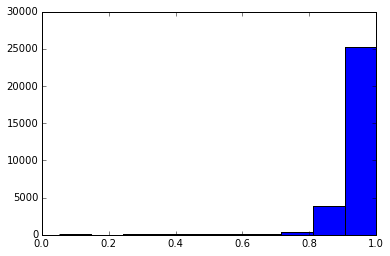

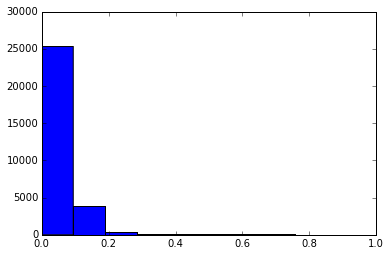

In [10]:
prediction = predict(clf, Xtest, ytest)
print '\n', prediction

#3. Evaluate Model
    Learning Curve

In [11]:
def learningCurve(listOfNum, Xtrain, ytrain, Xcv, ycv, C = 1):
    '''
        prints learning curve
    returns: None
    '''
    accuracyTList = []
    accuracyCvList = []
    fscoreTList = []
    fscoreCvList = []
    
    clf = LogisticRegression(C = C)
    
    for i in listOfNum:
        # slice training examples       
        Xt_part = Xtrain.iloc[0:i,:]
        yt_part = ytrain.iloc[0:i]
        
        # train
        clf.fit(Xt_part, yt_part)
        
        # predict & get accuracy
        accuracy, precision, recall, fscore = getMeasures(yt_part, \
                                                  getPrediction(clf, Xt_part))
        accuracyCv, precisionCv, recallCv, fscoreCv = getMeasures(ycv, \
                                                  getPrediction(clf, Xcv))
        
        accuracyTList.append(accuracy)
        accuracyCvList.append(accuracyCv)
        fscoreTList.append(fscore)
        fscoreCvList.append(fscoreCv)
        
        print accuracy, accuracyCv

    # plot learning curve
    plt.plot(listOfNum, accuracyTList, label = 'Accuracy Train')
    plt.plot(listOfNum, accuracyCvList, label = 'Accuracy Cv')
    #plt.plot(listOfNum, fscoreTList, label = 'Fscore Train')
    #plt.plot(listOfNum, fscoreCvList, label = 'Fscore Cv')
    
    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("# of train data")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    
    
    return

0.98 0.931166666667
0.937647058824 0.931733333333
0.93495049505 0.932033333333
0.934370860927 0.932366666667
0.93368159204 0.932766666667
0.934780876494 0.932766666667
0.933687707641 0.932766666667
0.933703703704 0.932666666667
0.934064837905 0.932733333333
0.933680709534 0.932733333333
0.934111776447 0.9328
0.934083484574 0.9328
0.933793677205 0.932666666667
0.934055299539 0.9327
0.934194008559 0.932766666667
0.934167776298 0.932666666667
0.93429463171 0.932733333333
0.93428907168 0.9327


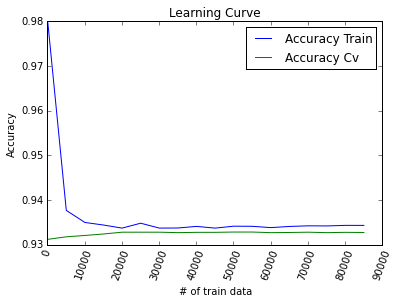

In [92]:
learningCurve(range(100, 90000, 5000), Xtrain, ytrain, Xcv, ycv, C = 1)

# 4. MODIFY MODEL
    1. Modify Threshold
    2. Add polynomial features
    3. Modify C (regularization term)
    4. Modified Model

###1. Modify Threshold

In [12]:
# 3. Threshold

def bestThreshold(listOfNum, Xtrain, ytrain, Xcv, ycv, C):
    '''
    returns: float, best Threshold
    '''
    fscoreList = []
    accuracyList = []

    for i in listOfNum:

        # 1 train
        clf = LogisticRegression(C = C)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold = i))

        fscoreList.append(fscore)
        accuracyList.append(accuracy)

        print "\nWhen Threshold is %f, accuracy is %f and fscore is %f." % (i, accuracy, fscore)

    # plot learning curve
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Threshold")
    plt.ylabel("F-score")
    plt.title("Threshold - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]

[0 1]
[[ 0.89936094  0.10063906]
 [ 0.90307508  0.09692492]
 [ 0.95975605  0.04024395]
 ..., 
 [ 0.96273322  0.03726678]
 [ 0.95554552  0.04445448]
 [ 0.9575431   0.0424569 ]]

When Threshold is 0.000000, accuracy is 0.068300 and fscore is 0.127867.
[0 1]
[[ 0.89936094  0.10063906]
 [ 0.90307508  0.09692492]
 [ 0.95975605  0.04024395]
 ..., 
 [ 0.96273322  0.03726678]
 [ 0.95554552  0.04445448]
 [ 0.9575431   0.0424569 ]]

When Threshold is 0.025000, accuracy is 0.157667 and fscore is 0.129821.
[0 1]
[[ 0.89936094  0.10063906]
 [ 0.90307508  0.09692492]
 [ 0.95975605  0.04024395]
 ..., 
 [ 0.96273322  0.03726678]
 [ 0.95554552  0.04445448]
 [ 0.9575431   0.0424569 ]]

When Threshold is 0.050000, accuracy is 0.503633 and fscore is 0.173686.
[0 1]
[[ 0.89936094  0.10063906]
 [ 0.90307508  0.09692492]
 [ 0.95975605  0.04024395]
 ..., 
 [ 0.96273322  0.03726678]
 [ 0.95554552  0.04445448]
 [ 0.9575431   0.0424569 ]]

When Threshold is 0.075000, accuracy is 0.732833 and fscore is 0.229549.


/Users/hee/.pyenv/versions/2.7.9/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


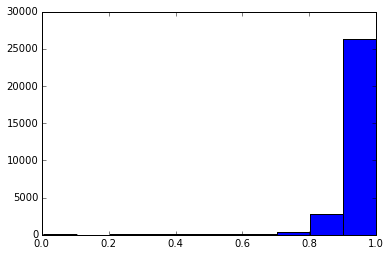

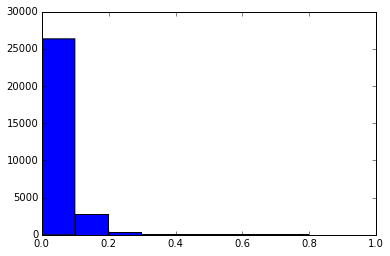

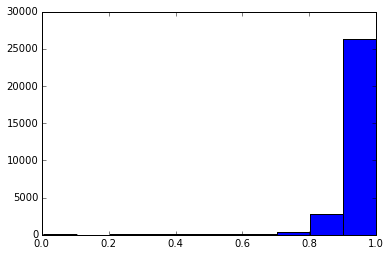

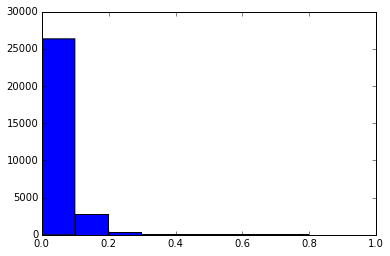

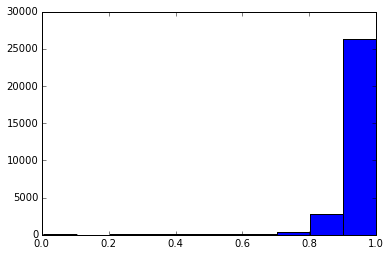

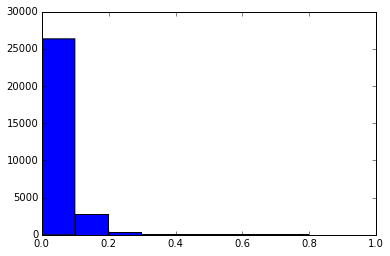

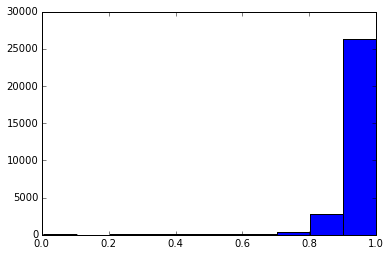

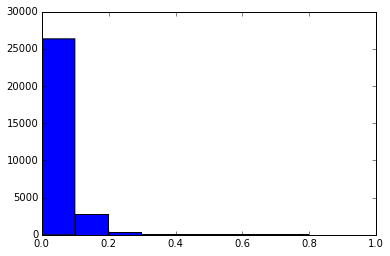

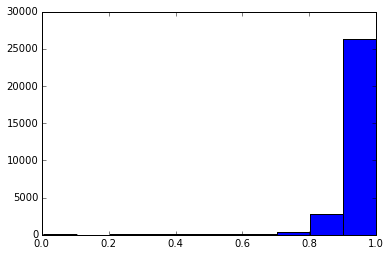

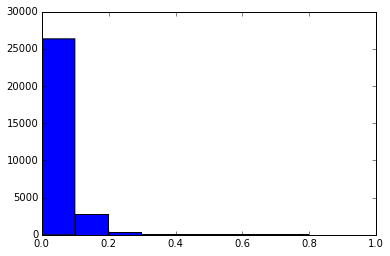

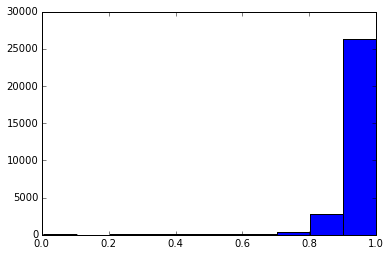

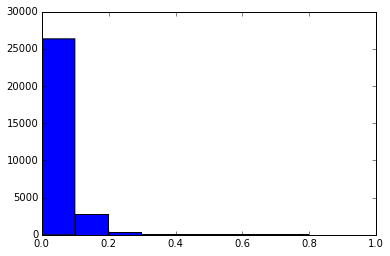

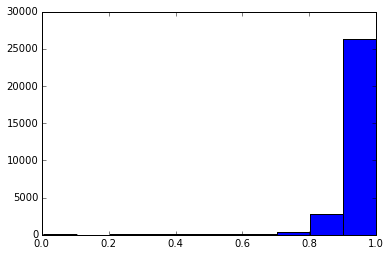

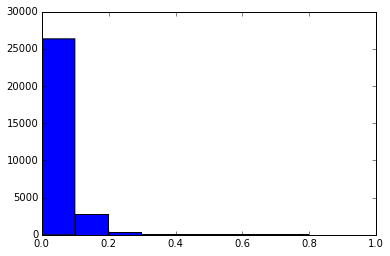

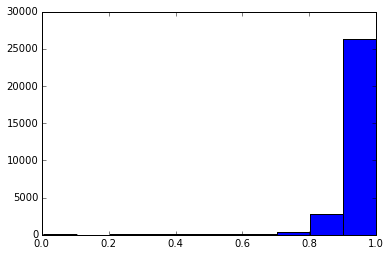

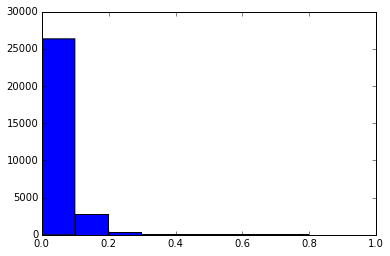

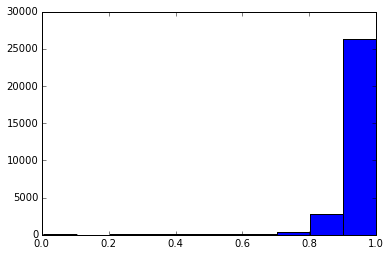

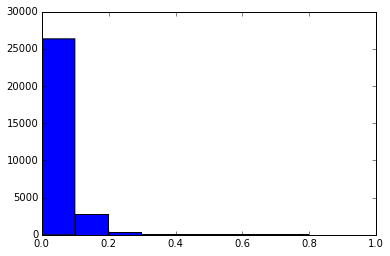

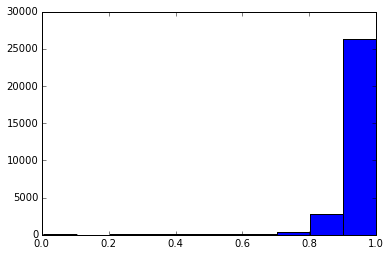

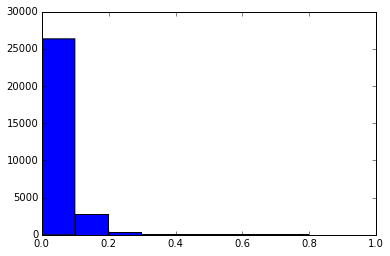

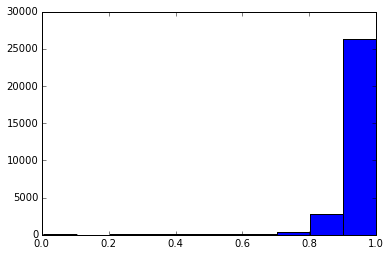

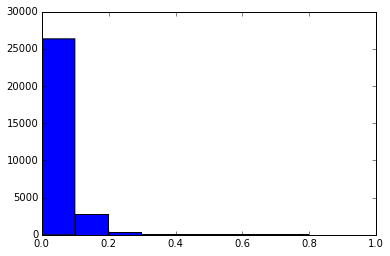

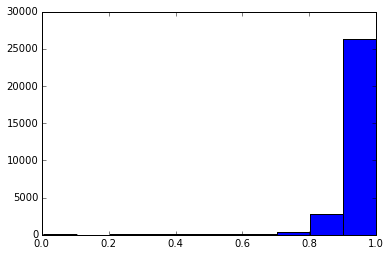

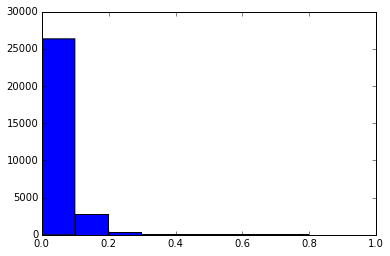

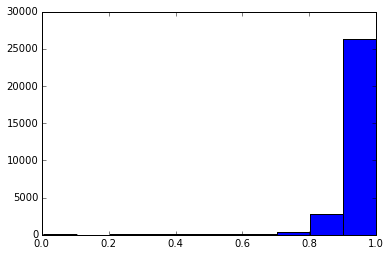

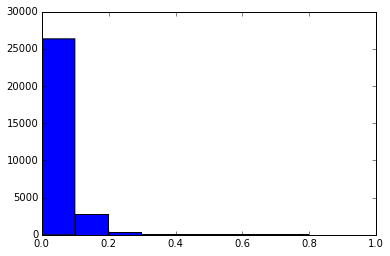

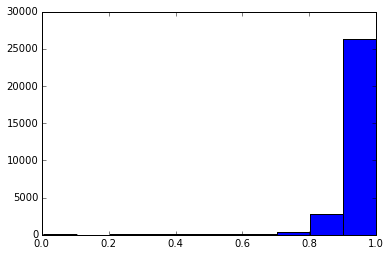

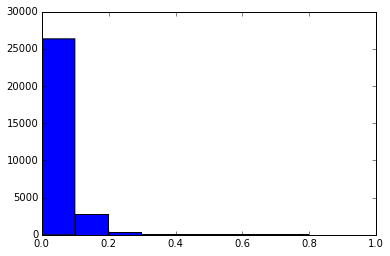

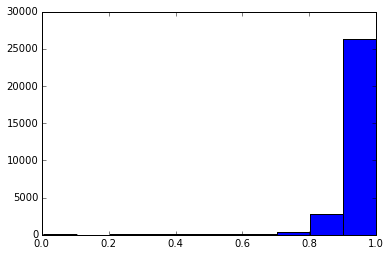

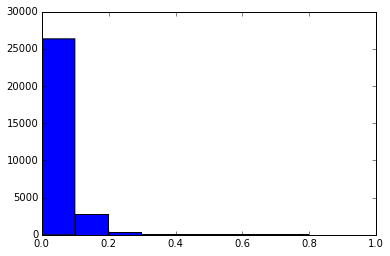

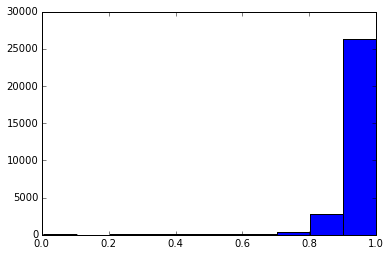

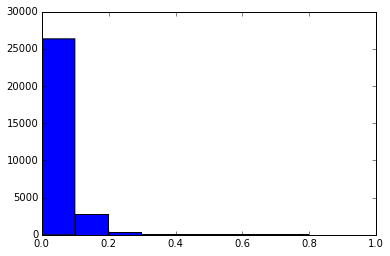

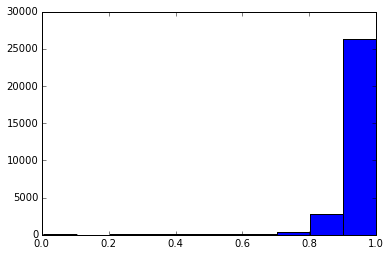

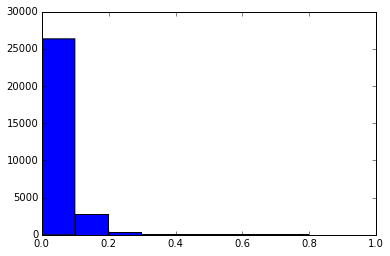

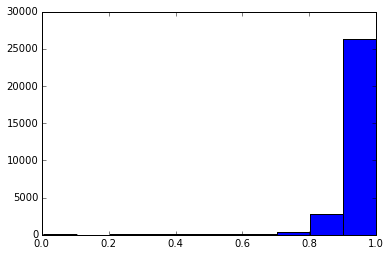

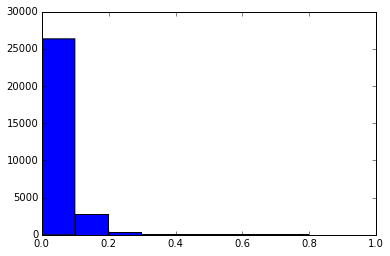

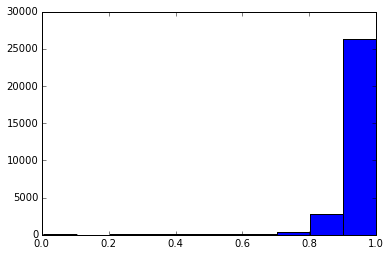

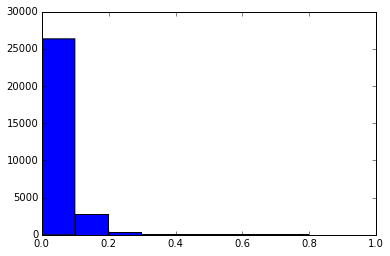

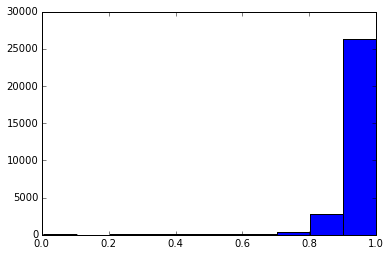

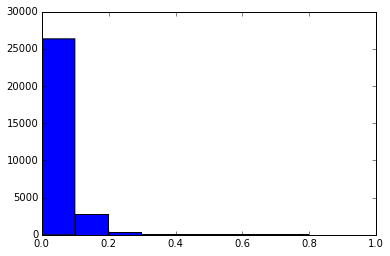

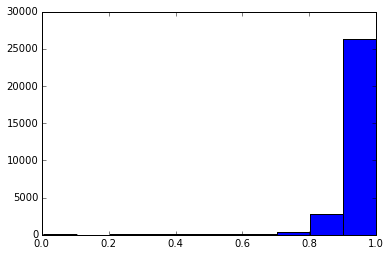

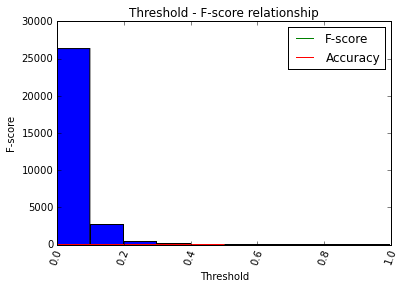

In [13]:
bestT = bestThreshold(np.linspace(0, 0.5, 21), Xtrain, ytrain, Xcv, ycv, C = 2)
print '\nThreshold that maximizes F-score >>', bestT

###2. Add polynomial features
        1) add polynomial features
        2) find optimum polynomial degree

In [18]:
# 1) add polynomial features

from sklearn.preprocessing import PolynomialFeatures

def polyFeature(level, X):
    '''
    level: int >=1
    X
    
    returns: X with polynomial features
    '''
    
    poly = PolynomialFeatures(level)
    Xpoly = poly.fit_transform(X)
    
    return Xpoly

In [19]:
# 2) find optimum polynomial degree

def bestPoly(listOfNum, Xtrain, ytrain, Xcv, ycv, C = 1, threshold = 0.5):
    '''
        prints Polynomial term - F-score relationship
    returns: int, best polynomial term
    '''
    
    accuracyList = []
    fscoreList = []

    for i in listOfNum:
        print 'Polynomial %d' % i
        
        # 1 add polynomial terms
        XtrainPoly = polyFeature(i, Xtrain)
        XcvPoly = polyFeature(i, Xcv)

        # 2 train
        clf = LogisticRegression(C = C)
        clf.fit(XtrainPoly, ytrain)

        # 3 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, getPrediction(clf, XcvPoly, threshold))
        
        accuracyList.append(accuracy)
        fscoreList.append(fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Polynomial term")
    plt.ylabel("F-score")
    plt.title("Polynomial term - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)
    
    return listOfNum[maxIndex]

Polynomial 1
[0 1]
[[ 0.89921159  0.10078841]
 [ 0.90293248  0.09706752]
 [ 0.95968536  0.04031464]
 ..., 
 [ 0.96268114  0.03731886]
 [ 0.95548924  0.04451076]
 [ 0.95748689  0.04251311]]
Polynomial 2
[0 1]
[[ 0.88789541  0.11210459]
 [ 0.89115306  0.10884694]
 [ 0.9541027   0.0458973 ]
 ..., 
 [ 0.96497391  0.03502609]
 [ 0.96101806  0.03898194]
 [ 0.96150303  0.03849697]]
Polynomial 3
[0 1]
[[ 0.61666629  0.38333371]
 [ 0.55314642  0.44685358]
 [ 0.55265241  0.44734759]
 ..., 
 [ 0.56014181  0.43985819]
 [ 0.5464128   0.4535872 ]
 [ 0.54217385  0.45782615]]

Polynomial term that maximizes F-score >> 2


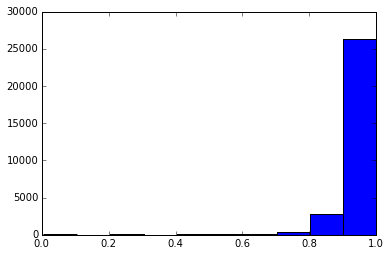

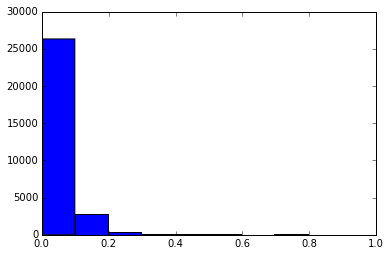

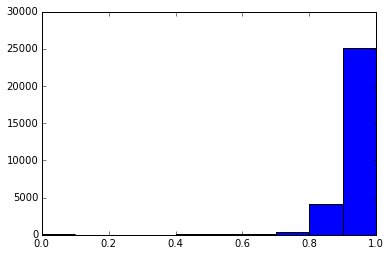

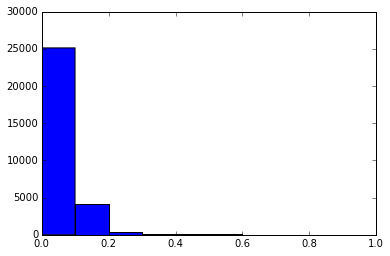

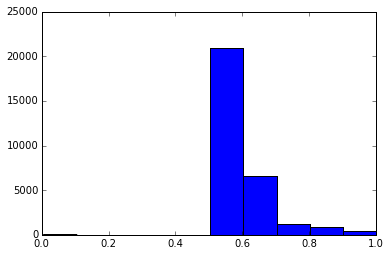

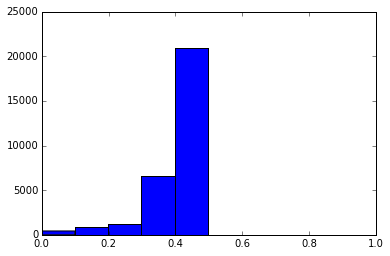

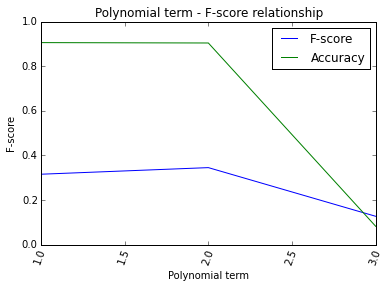

In [20]:
bestP = bestPoly(range(1,4), Xtrain, ytrain, Xcv, ycv, C = 1, threshold = bestT)
print '\nPolynomial term that maximizes F-score >>', bestP

###3. Modify C (regularization term)

In [21]:
# 3. Modify C

def bestC(listOfNum, Xtrain, ytrain, Xcv, ycv, threshold = 0.5):
    accuracyList = []
    fscoreList = []
    
    for i in listOfNum:

        # 1 train
        clf = LogisticRegression(C = i)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold))
        accuracyList.append(accuracy)
        fscoreList.append(fscore)

        print '\nWhen C = %d, accuracy is %f and f-score is %f.' % (i, accuracy, fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("C")
    plt.ylabel("F-score")
    plt.title("C - F-score relationship")

    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]

[0 1]
[[ 0.88824954  0.11175046]
 [ 0.89137608  0.10862392]
 [ 0.95408751  0.04591249]
 ..., 
 [ 0.96496549  0.03503451]
 [ 0.96099681  0.03900319]
 [ 0.96149334  0.03850666]]

When C = 1, accuracy is 0.904100 and f-score is 0.345690.
[0 1]
[[ 0.92582886  0.07417114]
 [ 0.92541112  0.07458888]
 [ 0.96281562  0.03718438]
 ..., 
 [ 0.96799411  0.03200589]
 [ 0.96489082  0.03510918]
 [ 0.96370105  0.03629895]]

When C = 2, accuracy is 0.910967 and f-score is 0.404725.
[0 1]
[[ 0.93097284  0.06902716]
 [ 0.93054095  0.06945905]
 [ 0.9677383   0.0322617 ]
 ..., 
 [ 0.97224066  0.02775934]
 [ 0.96863801  0.03136199]
 [ 0.96726824  0.03273176]]

When C = 3, accuracy is 0.909600 and f-score is 0.414002.
[0 1]
[[ 0.89505909  0.10494091]
 [ 0.89607243  0.10392757]
 [ 0.95365668  0.04634332]
 ..., 
 [ 0.96466298  0.03533702]
 [ 0.96050801  0.03949199]
 [ 0.96123489  0.03876511]]

When C = 4, accuracy is 0.910767 and f-score is 0.358187.
[0 1]
[[ 0.89144388  0.10855612]
 [ 0.89351233  0.10648767]


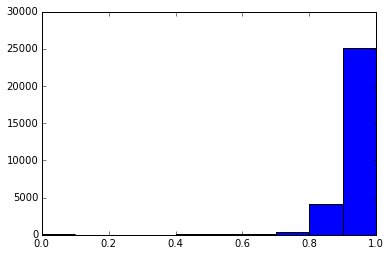

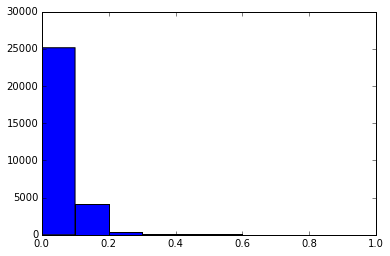

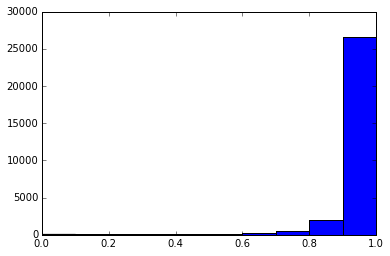

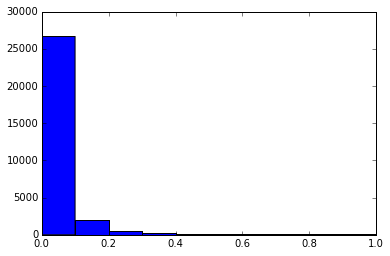

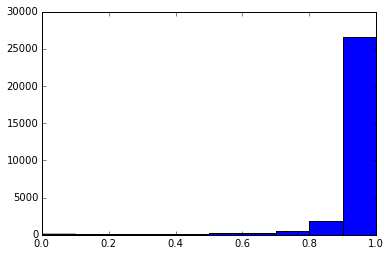

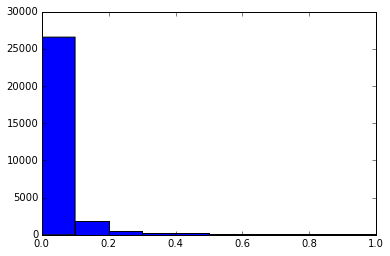

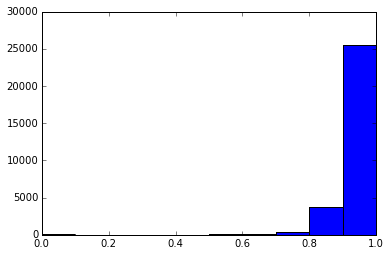

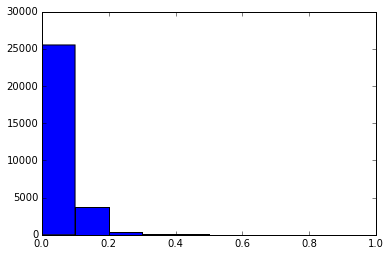

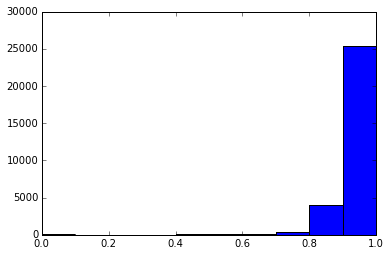

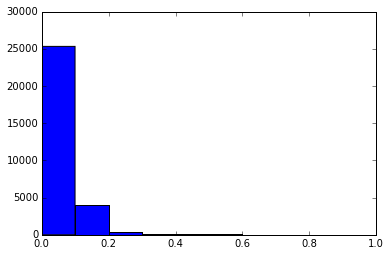

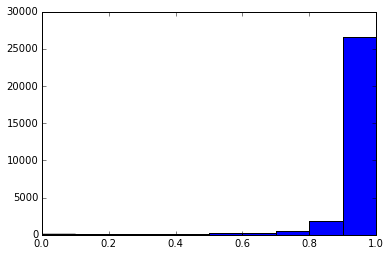

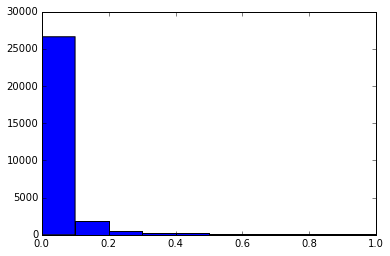

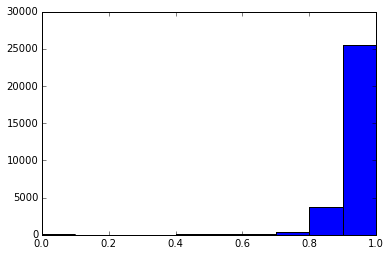

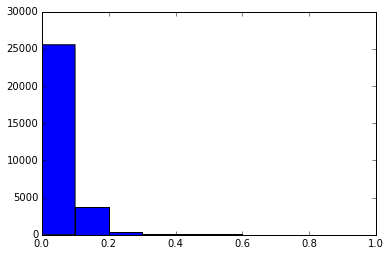

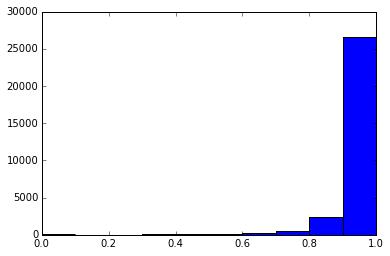

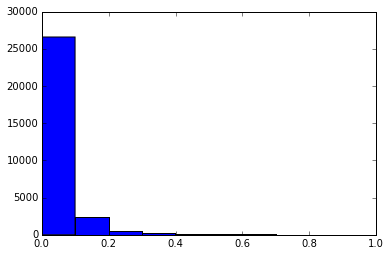

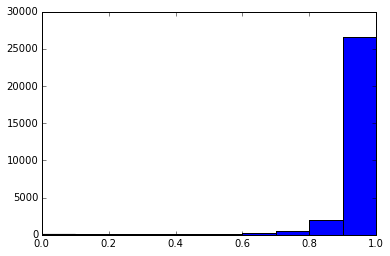

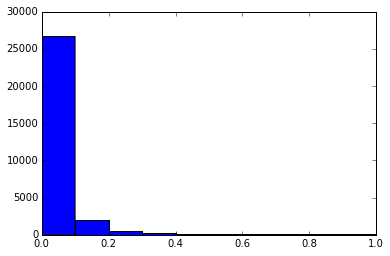

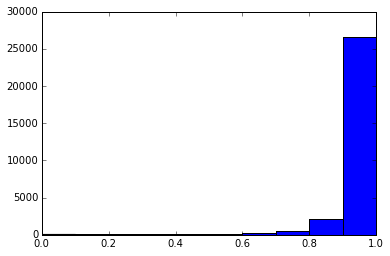

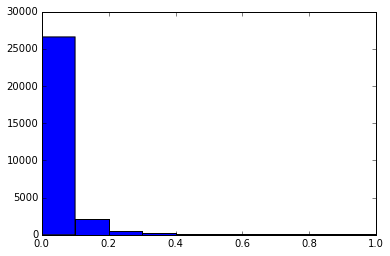

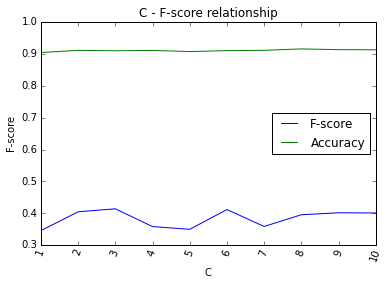

In [22]:
XtrainPoly = polyFeature(bestP, Xtrain)
XcvPoly = polyFeature(bestP, Xcv)

bestc = bestC(np.linspace(1, 10, 10), XtrainPoly, ytrain, XcvPoly, ycv, threshold = bestT)
print '\nC that maximizes F-score >>', bestc

### 4. Modified Model
    Train again with modified parameters
    (Higher f-score expected, in sacrifice of accuracy)
    1. Modified Threshold: 0.125
    2. Modified Polynomial Term: 2
    3. Modified C: 3

[0 1]
[[ 0.72347191  0.27652809]
 [ 0.9752811   0.0247189 ]
 [ 0.96431433  0.03568567]
 ..., 
 [ 0.91913798  0.08086202]
 [ 0.92066416  0.07933584]
 [ 0.97249043  0.02750957]]

accuracy 0.909433333333
precision 0.361295357004
recall 0.461615154536
fscore 0.405340337054


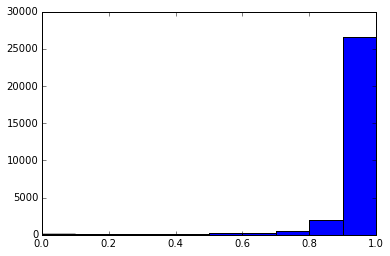

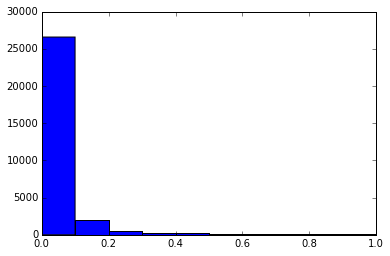

In [23]:
# 1. Modified Threshold: 0.125
bestT

# 2. Modified polynomial degree: 2
XtrainPoly = polyFeature(bestP, Xtrain)
XtestPoly = polyFeature(bestP, Xtest)

# 3. Modified C: 3
bestc

# Modified Model
    # Train
bestClf = LogisticRegression(C = bestc)
bestClf.fit(XtrainPoly, ytrain)

    # Predict
bestPrediction = predict(bestClf, XtestPoly, ytest, threshold = bestT)

In [24]:
bestClf.classes_

array([0, 1])

In [25]:
trainPoly = np.append(XtrainPoly, np.array(ytrain).reshape(90000,1), axis = 1)
np.savetxt('training_unbalanced_poly.csv', trainPoly, delimiter=',')